### **REGULARISATION**

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons

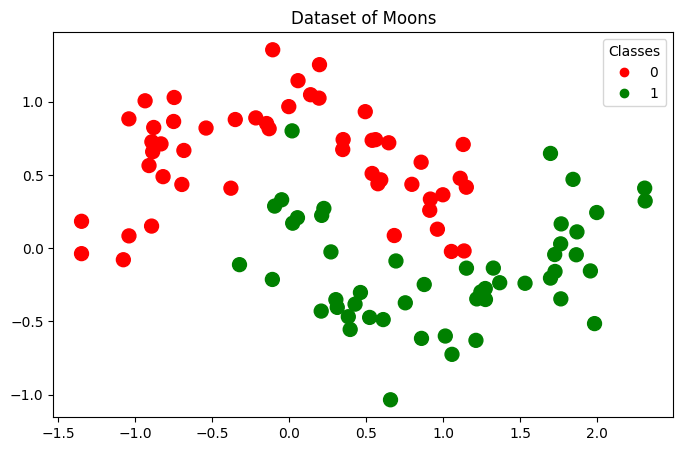

In [17]:
np.random.seed(800)
# Create a dataset of moons with some noise
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
zero_one_colormap = ListedColormap(['red', 'green'])
rcParams['figure.figsize'] = 8, 5
sactter = plt.scatter(X[:, 0], X[:,1],c=y, s=100,cmap=zero_one_colormap)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
plt.title('Dataset of Moons')
plt.show()

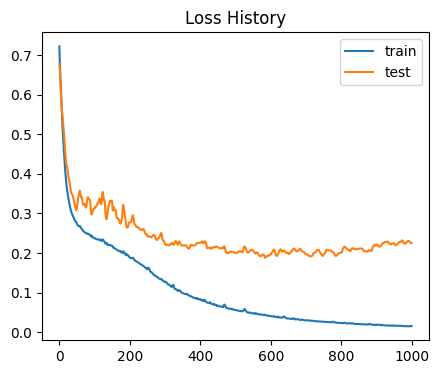

In [7]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)
# Define a Sequential model
model = Sequential()
# Add layers to the model with L1 regularization
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),
                    epochs=1000, verbose=0)
# Plot loss history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss History')
plt.show()

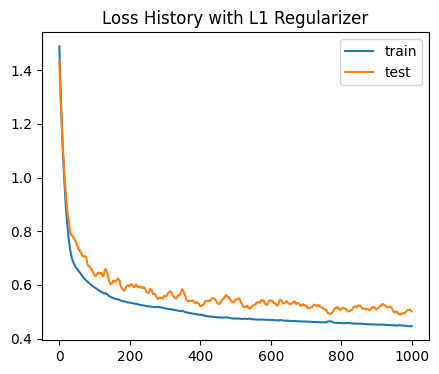

In [8]:
reg_l1_model = Sequential()
# Add layers to the model with L1 regularization
reg_l1_model.add(Dense(500, input_dim=2, activation='relu',
                       kernel_regularizer=tf.keras.regularizers.l1(0.01)))
reg_l1_model.add(Dense(1, activation='sigmoid',
                       kernel_regularizer=tf.keras.regularizers.l1(0.01)))
# Compile the model
reg_l1_model.compile(loss='binary_crossentropy',optimizer='adam',
                     metrics=['accuracy'])
# Train the model
history = reg_l1_model.fit(X_train, y_train,validation_data=(X_test, y_test),
                           epochs=1000, verbose=0)
# Plot loss history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss History with L1 Regularizer')
plt.show()

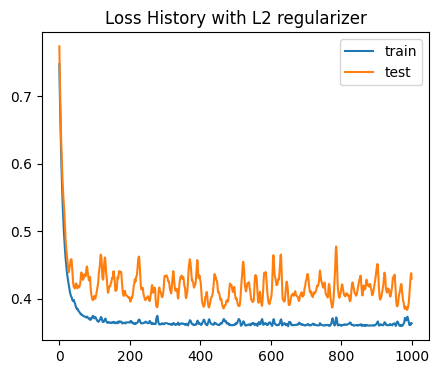

In [9]:
reg_l2_model = Sequential()
reg_l2_model.add(Dense(500, input_dim=2, activation='relu',
                       kernel_regularizer='l2'))
reg_l2_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_l2_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

reg_history = reg_l2_model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=1000, verbose=0)

plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss History with L2 regularizer')
plt.show()